# Question

 The company now wants to predict the cost they should set for a new variant of these kinds of bags based on the attributes below. As a result, they want you to build a prediction model which can correctly set the cost of the bag provided the attributes are given. The task involves the following things:
  Analyse the dataset and do EDA (Exploratory Data Analysis) – 6 Marks
   Plotting of various graphs & correlations – 2 Marks
   Model Building using Multiple Linear Regression – 12 Marks (OLS Approach – 3 Marks, Gradient Descent – 3 Marks,, Mini Batch Gradient – 3 Marks, Stochastic Gradient – 3 Marks)
  Evaluation of each model with R squared, RMSE and MSE for the model - 2 Marks  Observations / Conclusions – 2 Marks

In [606]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [607]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [608]:
cd

/Users/yashbhinwal


In [609]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #Display Complete Data

In [610]:
data = pd.read_csv('Downloads/AIML_C5_May 2021_Data_miniproject.csv')

# Analyzing Data

In [611]:
df = data.copy()

In [612]:
df.columns

Index(['Cost', 'Weight', 'Weight1', 'Length', 'Height', 'Width'], dtype='object')

In [613]:
type(df.iloc[0].Cost)

numpy.float64

In [614]:
type(df.iloc[0].Width)

str

In [615]:
for int, k in df.iterrows():
    try:
        df.at[int,"Width_float"] = np.float64(k.Width)
    except:
        df.at[int,"Width_float"] = np.float64(0) #Replace place where float value is not there with 0 (will drop these rows later)
    

In [616]:
df.Width_float.describe()

count       158.000000
mean       3801.834992
std       47733.087477
min           0.000000
25%           3.380625
50%           4.248050
75%           5.586750
max      600000.000000
Name: Width_float, dtype: float64

Maximum value in Width column is an outlier, need to replace this with mean/median/mode

In [617]:
for int, k in df.iterrows():
    try:
        df.at[int,"Length_float"] = np.float64(k.Length)
    except:
        df.at[int,"Length_float"] = np.float64(0)
    

In [618]:
df.Length_float.describe()

count    159.000000
mean      31.042767
std       11.870629
min        0.000000
25%       22.950000
50%       29.400000
75%       39.650000
max       68.000000
Name: Length_float, dtype: float64

In [619]:
for int, k in df.iterrows():
    try:
        df.at[int,"Weight_float"] = np.float64(k.Weight)
    except:
        df.at[int,"Weight_float"] = np.float64(0)
    

In [620]:
df.Weight_float.describe()

count    159.000000
mean      25.929560
std       10.411602
min        0.000000
25%       19.000000
50%       25.000000
75%       32.700000
max       59.000000
Name: Weight_float, dtype: float64

# Removing Outliers

Use Percentile Method/ IQR / Z Score (Normal Distribution) / SD.
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
Reference Link - https://www.kaggle.com/vaishnavikhilari/boston-house-price-prediction/notebook

<AxesSubplot:>

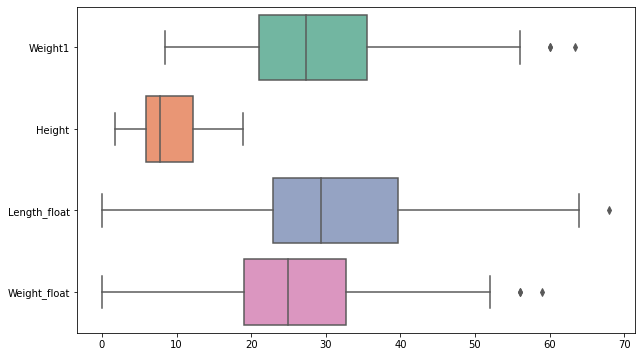

In [621]:
sns.boxplot(data=df[['Weight1','Height','Length_float','Weight_float']],orient='h',palette='Set2')


AxesSubplot(0.125,0.125;0.775x0.755)


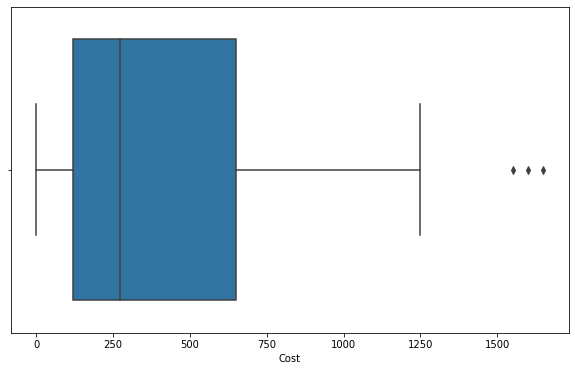

In [622]:
print(sns.boxplot(x=df['Cost']))

<AxesSubplot:xlabel='Width_float'>

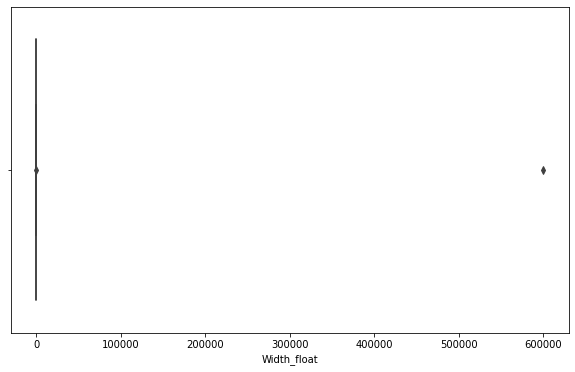

In [623]:
sns.boxplot(x=df['Width_float'])

https://www.google.com/url?sa=i&url=https%3A%2F%2Fsphweb.bumc.bu.edu%2Fotlt%2FMPH-Modules%2FPH717-QuantCore%2FPH717-Module6-RandomError%2FPH717-Module6-RandomError5.html&psig=AOvVaw0mgOTwyUNOcMSE-pDijtSS&ust=1622024490189000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCKjwvZ7O5PACFQAAAAAdAAAAABAI

In [624]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR , '\n\n         Q1\n',Q1,'\n\n         Q3\n',Q3)

Cost            530.000000
Weight1          14.500000
Height            6.308100
Width_float       2.206125
Length_float     16.700000
Weight_float     13.700000
dtype: float64 

         Q1
 Cost            120.000000
Weight1          21.000000
Height            5.940600
Width_float       3.380625
Length_float     22.950000
Weight_float     19.000000
Name: 0.25, dtype: float64 

         Q3
 Cost            650.00000
Weight1          35.50000
Height           12.24870
Width_float       5.58675
Length_float     39.65000
Weight_float     32.70000
Name: 0.75, dtype: float64


# Replacing NaN and outliers with Mean/Median/Mode

In [625]:
mean_value = df.Height.mean()
df['Height'].fillna(value=mean_value, inplace=True)

Finding Width_float outlier

In [626]:
for int,k in df.iterrows():
    if(k.Width_float > 50):
        print(int)

142


In [627]:
df.iloc[142]

Cost              1600.0
Weight                56
Weight1             60.0
Length                64
Height               9.6
Width             600000
Width_float     600000.0
Length_float        64.0
Weight_float        56.0
Name: 142, dtype: object

Replacing 60000 with the mean and keeping remaining data same will corrupt the row.

In [628]:
df.at[142,"Width_float"] = None

In [629]:
mean_value = df.Width_float.mean()
df['Width_float'].fillna(value=mean_value, inplace=True)

In [630]:
df.drop(columns = ['Width','Length','Weight'],inplace = True)

In [631]:
df.describe()

,Cost,Weight1,Height,Width_float,Length_float,Weight_float
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,8.933124,4.394451,31.042767,25.929560
std,357.978317,10.716328,4.259525,1.698826,11.870629,10.411602
min,0.000000,8.400000,1.728400,0.000000,0.000000,0.000000
25%,120.000000,21.000000,5.944800,3.385650,22.950000,19.000000
50%,273.000000,27.300000,7.786000,4.248500,29.400000,25.000000
75%,650.000000,35.500000,12.143400,5.574750,39.650000,32.700000
max,1650.000000,63.400000,18.957000,8.142000,68.000000,59.000000


Earlier, we have converted string values to 0. I am dropping these rows

In [632]:
df_new = df[(df[['Cost','Weight1','Height','Width_float','Length_float','Weight_float']] != 0).all(axis=1)]
df_new.reset_index(inplace=True,drop='index')

In [633]:
df_new.describe()

,Cost,Weight1,Height,Width_float,Length_float,Weight_float
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,402.291558,28.488961,8.902609,4.431994,31.268831,26.317532
std,361.555958,10.860220,4.282493,1.685095,11.761733,10.132276
min,5.900000,8.400000,1.728400,1.047600,8.800000,7.500000
25%,120.000000,21.000000,5.922225,3.398650,23.125000,19.025000
50%,281.500000,27.400000,7.733000,4.314050,29.700000,25.300000
75%,672.500000,36.000000,11.931750,5.586750,39.775000,32.775000
max,1650.000000,63.400000,18.957000,8.142000,68.000000,59.000000


In [634]:
df.describe()

,Cost,Weight1,Height,Width_float,Length_float,Weight_float
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,8.933124,4.394451,31.042767,25.929560
std,357.978317,10.716328,4.259525,1.698826,11.870629,10.411602
min,0.000000,8.400000,1.728400,0.000000,0.000000,0.000000
25%,120.000000,21.000000,5.944800,3.385650,22.950000,19.000000
50%,273.000000,27.300000,7.786000,4.248500,29.400000,25.000000
75%,650.000000,35.500000,12.143400,5.574750,39.650000,32.700000
max,1650.000000,63.400000,18.957000,8.142000,68.000000,59.000000


In [661]:
df = df_new.copy()

# Plotting Graph and Correlation

<AxesSubplot:>

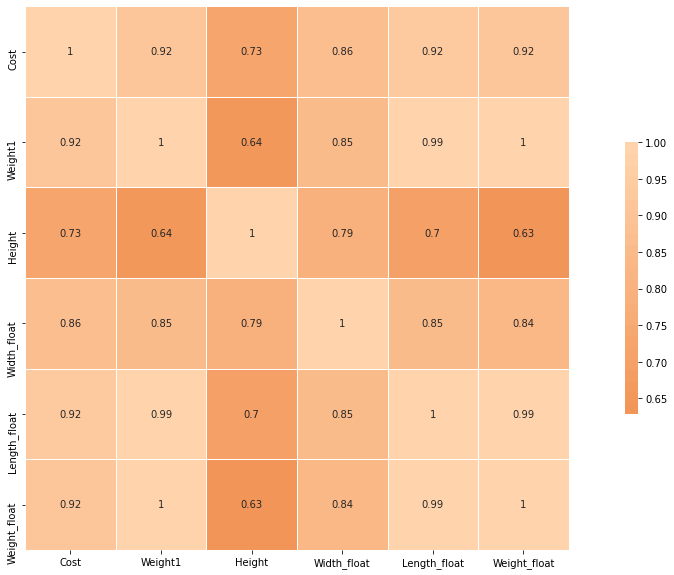

In [662]:

f, ax = plt.subplots(figsize=(20, 10))
# cmap = sns.diverging_palette(20, 200, as_cmap=True)
sns.heatmap(df.corr(), annot=True, center=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Cost greatly depends on Weight1, Weight_float Length_float (originally Length)

# Regression line - OLS

In [663]:
#Getting Input Variables data
X = df[['Weight1','Height', 'Width_float','Length_float','Weight_float']]
#Getting Output Data
y = df['Cost']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(x_train,y_train)

LinearRegression(normalize=True)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

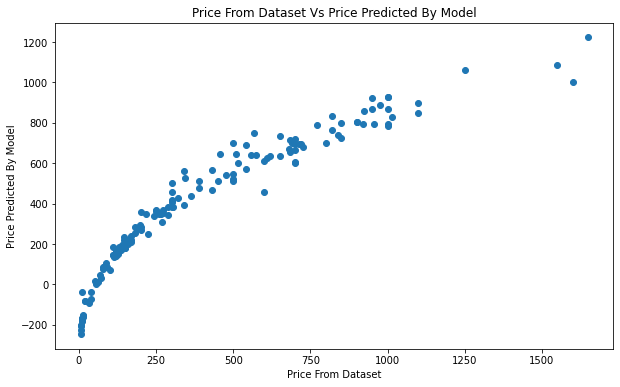

In [664]:
plt.scatter(y, model_ols.predict(X))
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Price From Dataset Vs Price Predicted By Model")


In [665]:
df.head()

,Cost,Weight1,Height,Width_float,Length_float,Weight_float
0,242.0,25.4,11.5200,4.0200,30.0,23.2
1,290.0,26.3,12.4800,4.3056,31.2,24.0
2,340.0,26.5,12.3778,4.6961,31.1,23.9
3,363.0,29.0,12.7300,4.4555,33.5,26.3
4,430.0,29.0,12.4440,5.1340,34.0,26.5


In [666]:
y_pred = model_ols.predict(x_test)

In [667]:
metrics.mean_squared_error(y_test,y_pred)

24036.701997695414

In [668]:
metrics.r2_score(y_test,y_pred)

0.8653958372024664

In [669]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

155.03774378420056

Check if Model is overfitting - divide the data into testing and training dataset.https://www.askpython.com/python/examples/split-data-training-and-testing-set

# Cross Validation Method

In [155]:
lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
scores      

array([0.86487752, 0.8162907 , 0.80001567, 0.81715519, 0.85521999])

Reference Link - https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

# Check Overfitting

In [673]:

X = df[['Weight1','Height', 'Width_float','Length_float','Weight_float']]
y = df['Cost']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2) #keeping 20 % data as testing data for later use.

model_ols_ofit =  linear_model.LinearRegression(normalize=True)
model_ols_ofit.fit(x_train,y_train)

LinearRegression(normalize=True)

In [674]:
r2_score(y_test, model_ols_ofit.predict(x_test))



0.8531915329119422

Why does this value change post every new set up ? Possible Reason - Shuffle of Test- Train Data. Solution - Do cross validation

In [675]:
Rsq = model_ols_ofit.score(x_train,y_train)

N = 6

K =1

fstat = (Rsq/(1-Rsq))*((N-K-1)/K) 
# fstat = scipy.stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

print(fstat)


32.6907619495848


The p-value is < .00001. The result is significant at p < .05.http://courses.atlas.illinois.edu/spring2016/STAT/STAT200/pf.html



# Usinf F-Statistics for Feature Selection

In [676]:
df.corr()

,Cost,Weight1,Height,Width_float,Length_float,Weight_float
Cost,1.000000,0.918596,0.726339,0.863920,0.923338,0.915751
Weight1,0.918596,1.000000,0.643278,0.846759,0.994343,0.999539
Height,0.726339,0.643278,1.000000,0.787665,0.703431,0.628486
Width_float,0.863920,0.846759,0.787665,1.000000,0.852153,0.840529
Length_float,0.923338,0.994343,0.703431,0.852153,1.000000,0.992323
Weight_float,0.915751,0.999539,0.628486,0.840529,0.992323,1.000000


In [201]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['Weight1','Height', 'Width_float','Length_float','Weight_float']]
y = np.round(df['Cost'])

#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,Weight1,616.927632
1,Height,288.575996
2,Width_float,97.014245
3,Length_float,687.930433
4,Weight_float,607.633504


# Trying out different Models

# Gradient Descent

In [677]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h


In [678]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost


In [679]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost


In [680]:
X = df_new[['Weight1','Height', 'Width_float','Length_float','Weight_float']]
y = df_new['Cost']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



Alpha is learning rate , num_iters - 1000

In [681]:
x_gd = x_train.to_numpy()
y_gd = y_train.to_numpy()

In [682]:
theta, cost = linear_regression(x_gd, y_gd, 0.0005, 7000)

In [683]:
linear_regression(x_gd, y_gd, 0.0005, 5000)

(array([[-134.41863403,    8.39494146,   22.5402215 ,  -24.11535221,
          -15.17679532,   27.00253483]]),
 array([45982.00845574, 28489.38656185, 25108.82974935, ...,
        15957.73932679, 15956.68033059, 15955.62149747]))

In [684]:
def predicted_values(coeff,x_test):
    y = []
    for i in range(len(x_test)):
        y.append( coeff [0] + coeff[1]*x_test[i][0] +  coeff[2]*x_test[i][1] +  coeff[3]*x_test[i][2] +  coeff[4]*x_test[i][3] +  coeff[5]*x_test[i][4])
    return y        

In [686]:
x_test_gd = x_test.to_numpy()

In [688]:
y_pred = predicted_values(theta[0], x_test_gd)

In [689]:
r2 = r2_score(y_test.to_numpy(), y_pred)


In [690]:
r2

0.7488452393954796

In [691]:
metrics.mean_squared_error(y_test,y_pred)

27562.300718803224

In [692]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

166.01897698396778

# SGDRegressor

In [696]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = df[['Weight1','Height', 'Width_float','Length_float','Weight_float']]
y = df['Cost']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


n_samples, n_features = 159, 6
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [697]:
x_test.head()

,Weight1,Height,Width_float,Length_float,Weight_float
49,27.0,8.5680,4.7736,30.6,25.0
26,36.0,16.8896,6.1984,41.6,32.8
50,31.7,9.4850,5.3550,35.0,29.5
83,22.0,6.1100,3.5250,23.5,20.0
91,24.0,7.2930,3.7230,25.5,22.0


Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

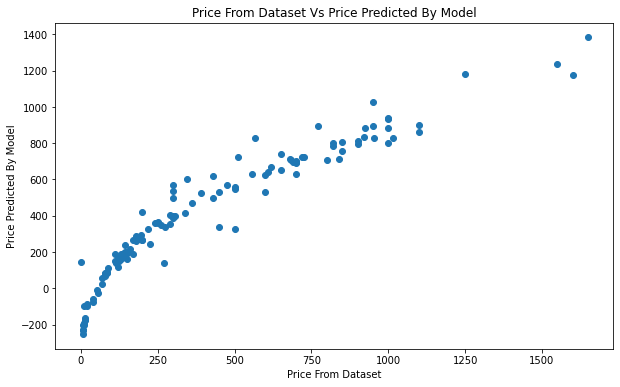

In [222]:
plt.scatter(y_train, reg.predict(x_train))
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Price From Dataset Vs Price Predicted By Model")



In [700]:
r2_score(y_test, reg.predict(x_test))




0.8588390594822215

In [702]:
metrics.mean_squared_error(y_test,y_pred)

162812.09391277807

In [703]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

403.49980658332174

# Summary

The size of dataset is too low. Cost greatly depends on Weight1, Weight and Length as per the correlation matrix. On running F-Statistics, all features seem relevant. We see some variation in score metrics when the regression code is run again.This is because the testing and training data set extracted get shuffled. I achieved r-square best in case of OLS. But I believe it could be equally good for Gradient descent too if the number of iterations is increased further. Stochastic Gradient Descent achieved fair results as it optimized the number of computations required ( taking one data set at a time) .